# 第１０回　推測統計（２）（推定）

今回は、母集団とサンプル、点推定の考え方、区間推定の考え方、といった内容を扱います。

## 母集団と標本（サンプル）

推測統計では、分析の対象とする母集団と、母集団から抽出された標本（サンプル）を明確に区別する必要があります。母集団と標本との関係ですが、標本は、母集団から抽出するごとに異なる値をとる確率変数だとみなします。従って、標本値には誤差を伴います。

ここでは、標本がどのような性質をもつかを、まとめます。

### 全数調査と標本調査

母集団のサイズがあまり大きくない場合には全部を調べることが可能で、全数調査といいます。しかし多くの場合は、母集団はサイズが大きく全てを把握できないので、母集団の標本を分析して母集団の特性を推測します。このような調査方法を標本調査といいます。また、これに基づく推定や、次回扱う検定のことを、統計的推測といいます。

### 統計量

**母集団**から無作為に取り出された大きさ$n$の**標本**はどのような特徴を持つでしょうか？  
その特徴を示す、標本から導き出した数量のことを、**統計量**といいます。  
例えば平均（**標本平均**ともいいます）$$\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}$$ は、**統計量**のひとつです。  

#### 実験１　サイズの異なる標本と母集団との統計量の違い

母集団の性質としてたいていの場合は、**正規分布**を想定します。正規分布に従う母集団から抽出された標本はそのサイズ（**標本の大きさ**、つまり、標本の中に含まれるデータの数）によって、どのような性質を示すでしょうか？

実際に確かめてみましょう。平均が100で分散が36の正規分布を示す10000個の数をつくります。これを母集団とします。

In [31]:
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
## ここまでは準備
generator = np.random.default_rng(12345)
population_2 = generator.normal(loc=100, scale=6, size=10000)

平均と分散を計算し、だいたいそれぞれ100と36になっていることを確認しましょう。

In [77]:
print("平均: ",np.mean(population_2))
print("分散: ",np.var(population_2))

平均:  100.0098075749368
分散:  36.33885906614785


次に、サイズの大きい標本と小さい標本とで、性質を比べてみましょう。まず、大きい方の、100個の標本を抽出しましょう。

In [32]:
sample_2 = np.random.choice(population_2,100,replace=False)

平均と分散を計算しましょう。

In [36]:
print("平均: ",np.mean(sample_2))
print("分散: ",np.var(sample_2))

平均:  99.89692532340548
分散:  36.745630523083605


あと２回、100個抽出して、それぞれ、平均と分散を計算しましょう。

In [40]:
sample_3 = np.random.choice(population_2,100,replace=False)
print("平均: ",np.mean(sample_3))
print("分散: ",np.var(sample_3))

平均:  100.22605284092592
分散:  36.90867359959816


In [46]:
sample_4 = np.random.choice(population_2,100,replace=False)
print("平均: ",np.mean(sample_4))
print("分散: ",np.var(sample_4))

平均:  99.61344150070114
分散:  42.063339064304344


では、9個抽出するとどうでしょうか？３回抽出してみます。

In [47]:
sample_5 = np.random.choice(population_2,9,replace=False)
print("平均: ",np.mean(sample_5))
print("分散: ",np.var(sample_5))

平均:  103.77784432498915
分散:  29.100499366100728


In [48]:
sample_6 = np.random.choice(population_2,9,replace=False)
print("平均: ",np.mean(sample_6))
print("分散: ",np.var(sample_6))

平均:  101.2012280509692
分散:  20.974676618320053


In [49]:
sample_7 = np.random.choice(population_2,9,replace=False)
print("平均: ",np.mean(sample_7))
print("分散: ",np.var(sample_7))

平均:  99.33217212401412
分散:  19.791602554171362


ここからいくつかのことが予想できると思います。
- 平均については、標本が大きくても小さくても、だいたい母集団と近い値が出る。
- 分散については、標本が小さいと小さくなりがちである。
- 平均も分散も、標本が大きい方が、安定した値が出る傾向がある。

これらのうち、２番めの性質に対応するために、**不偏分散**を計算する必要が出てくるのですが、その話は後でします。

３番めの性質について、**標本の大きさによる平均のブレ（誤差）の大きさ**を見積もるために、次に説明する「標本分布」を調べる必要があります。

### 標本分布

母集団からの標本の取り出しかたは通常たくさんあるので、**標本から作った統計量は、いつも同じというわけではなく、一定の範囲に分布する**でしょう。  
これによって生じる、**統計量の分布**のことを、**標本分布**といいます。

標本サイズによって標本分布がどうなるかを、シミュレーションで調べてみましょう。

#### 実験２　標本サイズによる標本平均の誤差

ここでは、**標本の大きさによる平均のブレ（誤差）の大きさ**を見積もるために、標本サイズと標本分布との関係をシミュレーションします。まず、100個から成る標本を抽出することを100回繰り返したとき、標本ごとに1つ、全部で100個の平均値ができるわけですが、その100個の平均値から計算した「<u>**標本平均の平均**</u>」と「<u>**標本平均の分散**</u>」はどの程度になるか、シミュレーションしてみます。

In [105]:
mean_100 = np.zeros(100)
for i in range(100):
    sample_i = np.random.choice(population_2,100,replace=False)
    sp_mean = np.mean(sample_i)
    mean_100[i] = sp_mean
print("平均の平均: ",np.mean(mean_100))
print("平均の分散: ",np.var(mean_100))

平均の平均:  99.9589636099926
平均の分散:  0.367631538682958


平均の分散を100倍すると、母集団の分散とほぼ等しくなることがわかりますね。これには理由があります、後ほど説明します。  
それに対して、9個抽出することを100回おこなったときの標本分布を、すなわち、平均の平均と平均の分散はどの程度になるか、シミュレーションしてみます。

In [116]:
mean_100 = np.zeros(100)
for i in range(100):
    sample_i = np.random.choice(population_2,9,replace=False)
    sp_mean = np.mean(sample_i)
    mean_100[i] = sp_mean
print("平均の平均: ",np.mean(mean_100))
print("平均の分散: ",np.var(mean_100))
print("平均の分散ｘ9: ", np.var(mean_100)*9)

平均の平均:  99.84846876103522
平均の分散:  4.176200681703528
平均の分散ｘ9:  37.58580613533175


このように、100個抽出しても、9個抽出しても、標本平均の平均は母集団の平均とだいたい一致します。  
しかし、標本平均のブレ（分散）の大きさは、標本の大きさが9個の場合のほうが、100個のときよりも、大きいことがわかります。つまり、標本の大きさが小さいと、標本平均をとりあえず母集団の平均とみなすことは構いませんが、標本が大きい場合よりもかなりの幅（**誤差**）があることを考慮する必要があります。

さらに、上のシミュレーション結果から、標本の大きさが100の場合、標本平均の分散が母集団の分散の$\frac{1}{100}$程度に、標本の大きさが9の場合、標本平均の分散が母集団の分散の$\frac{1}{9}$程度になっているように見えます。

### 平均値の標本誤差

実際、<font color=Maroon>母集団が平均$\mu$、分散$\sigma^2$の正規分布（以下、これを$$N(\mu,\sigma^2)$$と表します）に従うとき、  
$n$個の値からなる標本の平均$\bar{X}$は、$$N\Bigl(\mu, \frac{\sigma^2}{n}\Bigr)$$の正規分布に従う</font>ことが次のようにして示せます。

$n$個の標本の標本平均は、$$\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n} = \frac{X_1}{n} + \frac{X_2}{n} + ... + \frac{X_n}{n}$$です。ですから、何回も$n$個の標本抽出をしたとき、その**平均の平均**は、$n$個の**独立な**数$\frac{X_i}{n}$ （ただし$i = 1,2, ... n$）の**平均の総和**となります。同様に、**平均の分散**はそれら$n$個の独立な数の**分散の総和**となります。  
ここで、どのような分布であれ、母集団に属するすべての$X$に対して、$\frac{1}{n}$をかけた数の平均ならびに分散はもとの平均ならびに分散のそれぞれ$\frac{1}{n}$、$\frac{1}{n^2}$になることを思い出してください。  
これにより、$\frac{X_i}{n}$は$$N\Bigl(\frac{\mu}{n},\frac{\sigma^2}{n^2}\Bigr)$$の正規分布に従います。  
また、互いに独立な正規分布の集団の値を足して作った集団の平均は、もとの集団の平均を足したものになり、分散も、もとの集団の分散を足したものになります。  
ですから、$n$個の$\frac{X_i}{n}$(ただし$i = 1, 2, ..., n$)の総和$\bar{X}$は$$N\Bigl(\mu,\frac{\sigma^2}{n}\Bigr)$$の正規分布に従います。

実は、**中心極限定理**により、次のことがいえます。

母集団の平均値$\mu$と分散$\sigma^2$が有限値ならば、分布の形がどうであっても、標本の大きさ$n$が大であれば、標本平均値の分布は正規分布で近似され、$n$が大であるほどその近似度は大である。

ですから、**母集団の分布の形がどうであっても、大標本の場合ならば、平均値$\mu$、分散$\sigma^2$の母集団からとった大きさ$n$の標本の平均値$\bar{x}$は、平均値$\mu$、分散$\sigma^2 / n$の正規分布をし**、その標本誤差は<font color=Maroon>標本平均値の標準偏差</font><font color=Maroon>$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$</font>の3倍を超えることはきわめてまれで、2倍を超えることも5%以下です。  
この$\sigma_{\bar{x}}$を**平均値の標本誤差**または**標準誤差**といいます。

#### 実験３　標本の平均値の分布

この実験では、標本の平均値の分布を調べ、上で説明した誤差の範囲内であるかどうか確かめます。

そのために、平均が100で分散が25の正規分布をしめす10000個の数から100個の数を選びその平均値を求めます。これを1000回繰り返したときの平均値の分布を調べます。

まずモジュールのインポートです。

In [62]:
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

次のコードで数を10000個生成します。

numpy.random.default_rng()は乱数を発生します。引数を与えると結果が同じになります。  
またそれによってできた乱数のメソッドで、特定の分布をもつ数の集合を作ることができます。例えばメソッドnormal()で正規分布を示す数の集合を作ることができます。引数には、loc, scale, sizeなどのオプションがあり、それぞれ、平均、標準偏差、集合のサイズを指定します。

In [63]:
generator = np.random.default_rng(12345)
population_1 = generator.normal(loc=100, scale=5, size=10000)

ここからランダムに数を100個選び、平均値を求め、格納します。これを1000回繰り返します。

In [64]:
sq_2 = np.zeros(1000)
for i in range(1000):
    sample_1 = np.random.choice(population_1,100,replace=False)
    sp_mean = np.mean(sample_1)
    sq_2[i] = sp_mean

ヒストグラムを作り、正規分布$N(100,25/100)$と重ね描きします。$\frac{\sigma}{\sqrt{n}} = 5/10 = 0.5$で、上のとおり、平均値からこれの２倍 = $1$を離れるものがたいへん少ないことが見て取れます。

正規分布の確率密度関数はstats.norm.pdf()です。パラメータとして平均locと標準偏差scaleを与えることができます。デフォルトはloc=0, scale=1つまり標準正規分布です。

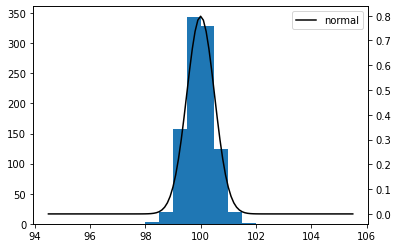

In [68]:
# figureインスタンスを作る
fig = plt.figure()
# Y軸を2つ作る。
ax1 = fig.subplots() # 1つめのY軸（左側）
ax2 = ax1.twinx() # 2つめのY軸　（右側）
x_bins = np.arange(94.5,105.5,0.5) #パラメータbinsに与える、各階級の左端の値。94.5~104.5まで0.5刻み
x_vals = np.arange(94.5,105.6,0.1) # 正規分布の確率密度関数の値を94.5から105.5まで0.1刻みの確率変数に対して求める
ax1.hist(sq_2,bins=x_bins)
ax2.plot(x_vals,stats.norm(loc=100,scale=0.5).pdf(x_vals),label='normal',color='k') # 正規分布
ax2.legend()

#### 練習問題（平均値の標本誤差）

母集団の標準偏差が$\sigma = 25$のとき、$n=100$の標本で標本平均値を計算して、$|\bar{x} - \mu| \leq 4$となる確率を求めよ。

ヒント：母集団の分布は不明ですが、標本の大きさ$n$が大なので、中心極限定理により、標本平均値$\bar{x}$は近似的に正規分布に従います。  
標本誤差$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} = \frac{25}{10} = 2.5$$です。

標本平均値$\bar{x}$から平均値の平均値$\mu$をひいて誤差で割ったもの$z_0$の分布は標準正規分布$N(0,1)$になります。

$-4 \le \bar{x} - \mu \le 4$です。そして、$z_0 = \frac{\bar{x} - \mu}{\sigma_{\bar{x}}}$です。  
つまり、$z_0$は$-4/2.5$から$4/2.5$までの間です。その間に$z_0$が収まる確率は、累積分布関数$F(X \leqq x)$の差になります。  
標準正規分布の累積分布関数はstats.norm.cdf()です。

In [28]:
import numpy as np
from scipy import stats
sigma = 25
n = 100
diff_lower = -4
diff_upper = 4
err = sigma/np.sqrt(n)
z_lower = -4/err
z_upper = 4/err
cdf_lower = stats.norm.cdf(z_lower)
cdf_upper = stats.norm.cdf(z_upper)
print ("Ans.: ",cdf_upper - cdf_lower)

Ans.:  0.890401416600884


### 標本分散と不偏分散

一方、標本の分散$$S^2 = \frac{1}{n}\sum_{i=1}^{n}(X - \bar{X})^2$$は、母集団の分散$\sigma^2$とどのような関係があるでしょうか？上で、$n=100$の場合と$n=9$の場合とを比べると。$n$が大きくなるほど母集団の分散に近づくのではないかと考えることでしょう。

$n$個の標本の平均を $\bar{X}$、標本の分散を$S^2$ とします。$S^2$の求め方は、  
$$S^2 = \frac{1}{n}\sum_{i=1}^{n}(X - \bar{X})^2$$  
です。

このとき、母集団の平均を$\mu$、分散を$\sigma^2$とすると、

$X - \bar{X} = (X - \mu) - (\bar{X} - \mu)$ですから、

$(X - \bar{X})^2 = ((X - \mu) - (\bar{X} - \mu))^2 = (X - \mu)^2 -2(X - \mu)(\bar{X} - \mu) + (\bar{X} - \mu)^2$　となりますので

$$S^2 = \frac{1}{n}\sum_{i=1}^{n}(X - \bar{X})^2 $$ 

$$= \frac{1}{n}\sum_{i=1}^{n}(X - \mu)^2 -\frac{1}{n}2\sum_{i=1}^{n}(X - \mu)(\bar{X} - \mu) + \frac{1}{n}\sum_{i=1}^{n}(\bar{X} - \mu)^2$$ 

$$= \frac{1}{n}\sum_{i=1}^{n}(X - \mu)^2 -\frac{1}{n}2(\bar{X} - \mu)(\sum_{i=1}^{n}X - \sum_{i=1}^{n}\mu) + \frac{1}{n}n(\bar{X} - \mu)^2$$

$$= \frac{1}{n}\sum_{i=1}^{n}(X - \mu)^2 -\frac{1}{n}2(\bar{X} - \mu)(n(\bar{X} - \mu)) + \frac{1}{n}n(\bar{X} - \mu)^2$$

$$= \frac{1}{n}\sum_{i=1}^{n}(X - \mu)^2 -(\bar{X} - \mu)^2$$

そして、$(X - \mu)^2$の期待値が$\sigma^2$である（母集団の分散なので）ことと、$(\bar{X} - \mu)^2$の期待値が$\frac{\sigma^2}{n}$である(標本平均の分散なので)ことから、$S^2$の期待値は、

$\frac{1}{n}n\sigma^2 - \frac{\sigma^2}{n} = \sigma^2 - \frac{1}{n}\sigma^2 = \frac{n-1}{n}\sigma^2$

となります。**つまり、$nS^2 = (n-1)\sigma^2$であり**、したがって、$$\sigma^2 = \frac{nS^2}{n-1} = \frac{1}{n - 1}\sum_{i=1}^{n}(X - \bar{X})^2$$となります。標本分散からこうして求められる数$U$を**不偏分散**といいます。

このように、**標本分散と不偏分散との関係**は、<font color=Maroon>$nS^2 = (n - 1)U^2$</font>です。この関係は、以後、$S^2$を$U^2$に置き換えるときに使います。

### 分散の標本誤差

実験３では、標本の平均値の分布の形を調べて図示し、平均値の平均ならびに分散を母集団の平均ならびに分散と比較しました。  
一方で、標本の分散の分布はどのような形になるのでしょうか？

### $\chi^2$ （カイ２乗）統計量

統計量として、平均からのズレの２乗の平均すなわち標本の分散を考えます。  
$n$個の標本の平均を $\bar{X}$、標本の分散を$S^2$ とします。$S^2$の求め方は、  
$$S^2 = \frac{1}{n}\sum_{i=1}^{n}(X - \bar{X})^2$$  
です。
これに標本の数$n$をかけ、**母集団の分散**$\sigma^2$（記号$\sigma$は母集団の標準偏差を表します）で割ったものつまり$$\frac{nS^2}{\sigma^2}$$を統計量とします。定義より、

$$\frac{nS^2}{\sigma^2} = \sum_{i=1}^n \Bigl(\frac{X - \bar{X}}{\sigma}\Bigr)^2 = x_1^2 + x_2^2 + ... + x_n^2 $$で、これを$\chi^2$と定義します。

定義からわかるように、$\{x_1, x_2, ..., x_n\}$は標準正規分布$N(0,1)$の母集団から互いに独立に選ばれた大きさ$n$の標本です。そして、$\chi^2$はそれらの平方和です。

この統計量は、$nS^2 = (n - 1)U^2$より、$$\frac{(n - 1)U^2}{\sigma^2}$$とも表現できます。こちらのほうが一般的に用いられます。この$U$を$S$の小文字の$s$で表している本が多いです。$s^2$の意味を標本分散と取り違えないように注意が必要です。

#### 実験４　$\chi^2$分布 をつくる

上で示したように、$\chi^2$分布とは、標準正規分布に従う標本の平方和の分布です。これはどのような形をしているのでしょうか。

実験３と同様に、母集団は、平均が100で分散が25の正規分布をしめす10000個の数とします。まず必要なライブラリをインポートします。

In [32]:
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

数を10000個生成します。

In [33]:
generator = np.random.default_rng(12345)
population_1 = generator.normal(loc=100, scale=5, size=10000)

ここから9個のサンプルをランダムに採取し、分散(標本分散)を求めます。numpy.var()のddofオプションは、標本分散なら0, 不偏分散なら1です。下のプログラムでは標本分散を求めています。それを1000回繰り返します。

In [23]:
sq_1 = np.zeros(1000)
for i in range(1000):
    sample_1 = np.random.choice(population_1,9,replace=False)
    sp_var = np.var(sample_1,ddof=0)
    sq_1[i] = sp_var

1000個の分散それぞれから統計量を作り(この場合は$\frac{n}{\sigma^2} = 9/25$をかける。もしさきほど不偏分散を求めていたら、$8/25$をかける)、ヒストグラムにします。また、自由度8（=9-1）の$X^2$分布の確率密度関数を重ね描きします。平均値の標本分布と異なり、左右対称になっていないのがわかります。

([<matplotlib.axis.XTick at 0x2618494a250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

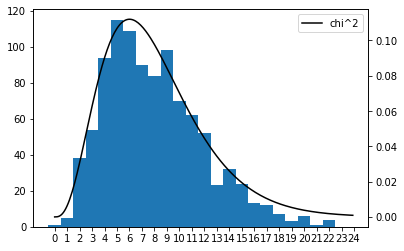

In [25]:
# figureインスタンスを作る
fig = plt.figure()
# Y軸を2つ作る。
ax1 = fig.subplots() # 1つめのY軸（左側）
ax2 = ax1.twinx() # 2つめのY軸　（右側）
x_bins = np.arange(-0.5,23.5,1) #パラメータbinsに与える、各階級の左端の値。-0.5から22.5まで1刻み
x_vals = np.arange(0,24,0.1) # Χ2分布の確率密度関数の定義値を0から23.9まで0.1刻みの確率変数に対して求める
ax1.hist(sq_1*9/25,bins=x_bins)
ax2.plot(x_vals,stats.chi2(df=8).pdf(x_vals),label='chi^2',color='k') # Χ２乗分布
ax2.legend()
plt.xticks(np.arange(0,25,1))

#### $\chi^2$分布の利用

$\chi^2$分布は、**標本分散と母集団の分散とを結びつける**はたらきをします。例えば、標本が９個の数値からなるとき、標本分散と母集団の分散の比の範囲はだいたいどれくらいまででしょうか？ 

累積分布関数$F(X \leqq x) = 0.95$となるような$x$を求めれば、95%が収まる$\chi^2$の範囲がわかります。  
scipy.stats.chi2(df=8).ppf(0.95)で求められます。
$\chi^2 = \frac{nS^2}{\sigma^2}$ですから$\frac{\chi^2}{9}$で分散の比が求められます。

In [26]:
stats.chi2(df=8).ppf(0.95)

15.50731305586545

In [27]:
stats.chi2(df=8).ppf(0.95)/9

1.7230347839850502

つまり、95%の場合は標本分散は母集団の分散の0から1.72倍以内に収まるということになります。それより大きな分散を見たら、母集団の分散についての想定が間違っているか、標本の取り方が正しくない可能性を検討する必要があるでしょう。

#### $\chi^2$分布の平均と分散

$n$個の標本に対して、$\chi^2$分布の平均は$n$, 分散は$2n$になることが知られています。

#### 練習問題（$\chi^2$分布）

$n = 10$個の標本の分散は、97.5%の確率で、母集団の分散$\sigma^2$の何倍までに収まると考えられますか？

ヒント：
- 標本分散$S^2$と母集団の分散$\sigma^2$との関係は、$\frac{nS^2}{\sigma^2}$が自由度$n - 1$の$\chi^2$分布になります。
- 自由度$n - 1 = 9$です。
- 累積分布関数$F(X \leqq x)$について、$x$がいくつになったら（つまり、確率密度関数を$-\infty$から（$\chi^2$分布については0から）どこまで積分したら）0.975になるかを求めます。  
- scipy.statsの各確率関数・確率密度関数にはそれを計算するための.ppf()関数があります。
- $\frac{S^2}{\sigma^2}$を求めるために、確率変数を$n$で割ります。

In [31]:
stats.chi2(df=9).ppf(0.975)/10

1.902276779864163

### $t$分布

平均$\mu$, 分散$\sigma^2$の正規分布$N(\mu,\sigma^2)$を示す母集団から$n$個取り出して作った標本について考えます。

標本平均$\bar{X}$の分散は$\frac{\sigma^2}{n}$ですから、$\bar{X} - \mu$の分散も同じです。そして、$\bar{X} - \mu$を標準誤差$\frac{\sigma}{\sqrt{n}}$で割って標準化したもの、つまり$$\frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$は、正規分布$N(1,0)$に従います。  
しかし、このままでは、母集団の分散$\sigma^2$がわからないと、標本の平均値を評価することが困難です。

一方、標本から作った統計量$\chi^2 = \frac{nS^2}{\sigma^2}$は自由度$n-1$の$\chi^2$分布に従うことはさきほど示しました。

これら２種類の統計量の間にはどのような関係があるのでしょうか？

後者を標本の自由度$n-1$で割って平方根を求めると、$$\frac{S}{\sigma}\sqrt{\frac{n}{n-1}}$$となります。これで標本の平均値を標準化した$$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$$を割ると、$$\frac{\bar{X} - \mu}{S/\sqrt{n - 1}}$$あるいは$$\frac{\bar{X} - \mu}{U/\sqrt{n}}$$となり、$\sigma$が消えます。

こうしてできた統計量は、式の形としては、最初の、$\mu$と$\sigma$と$n$で$\bar{X}$を標準化したものと似ていますが、どのような分布を示すでしょうか？

#### 実験５　$t$分布をつくる

まずシミュレーションしてみましょう。平均が100で分散が25の正規分布をしめす10000個の数を作るところまでは、実験３，４のときと同じです。

次に今度は少なめの数、9個からなる標本を取り出し、標本平均と標本分散を求め、それぞれ配列に収容します。それを1000回繰り返します。

In [71]:
sq_2 = np.zeros(1000) # 分散を収容
mn_2 = np.zeros(1000) # 平均を収容
for i in range(1000):
    sample_1 = np.random.choice(population_1,9,replace=False)
    sp_mean = np.mean(sample_1)
    sp_var = np.var(sample_1,ddof=0)
    sq_2[i] = sp_var
    mn_2[i] = sp_mean

標本平均と標本分散から統計量を作り、ヒストグラムにします。また、自由度8（=9-1）のt分布の確率密度関数と、正規分布$N(0,1)$の確率密度関数を参考として示します。

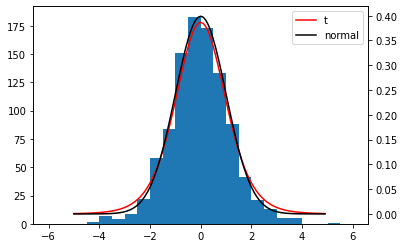

In [72]:
# figureインスタンスを作る
fig = plt.figure()
# Y軸を2つ作る。
ax1 = fig.subplots() # 1つめのY軸（左側）
ax2 = ax1.twinx() # 2つめのY軸　（右側）

ax1.hist((mn_2 - 100)*np.sqrt(8)/np.sqrt(sq_2),bins=np.arange(-6,6.2,0.5))
ax2.plot(np.arange(-5,5,0.1),stats.t.pdf(np.arange(-5,5,0.1),df=8), label='t',color='r') # t分布
ax2.plot(np.arange(-5,5,0.1),stats.norm.pdf(np.arange(-5,5,0.1),scale=1),label='normal',color='k') # 正規分布
ax2.legend()

このように$\frac{\bar{X} - \mu}{S/\sqrt{n - 1}}$は0を中心とする左右対称の分布を示しています。また、正規分布よりもむしろt分布のほうによく近似されることがわかります。例えば、平均値が誤差の２倍を超えることは無視できない程度あります。

実用上の見地からこれを考えると、次のようになるでしょう。少数しか標本をとれない場合、正規分布だけを使っているとやたら不合格が多くなってしまいますが、$t$分布を使えば、必要以上に不良品を出さずに済む、ということになります。

自由度が1,2,4,8の場合のt分布の確率密度関数を描いてみます。正規分布よりも平べったく裾野が広いこと、自由度が大きいほど正規分布に近づくことがわかります。

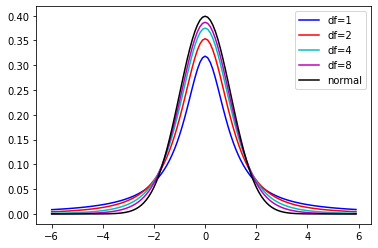

In [159]:
# figureインスタンスを作る
fig = plt.figure()
# Y軸を2つ作る。
ax1 = fig.subplots() # 1つめのY軸（左側）
ax1.plot(np.arange(-6,6,0.1),stats.t.pdf(np.arange(-6,6,0.1),df=1), label='df=1',color='b') # t分布, 自由度1
ax1.plot(np.arange(-6,6,0.1),stats.t.pdf(np.arange(-6,6,0.1),df=2), label='df=2',color='r') # t分布, 自由度2
ax1.plot(np.arange(-6,6,0.1),stats.t.pdf(np.arange(-6,6,0.1),df=4), label='df=4',color='c') # t分布, 自由度4
ax1.plot(np.arange(-6,6,0.1),stats.t.pdf(np.arange(-6,6,0.1),df=8), label='df=8',color='m') # t分布, 自由度8
ax1.plot(np.arange(-6,6,0.1),stats.norm.pdf(np.arange(-6,6,0.1),scale=1),label='normal',color='k') # 正規分布
ax1.legend()

上の自由度８の場合で、統計量が0から$+\infty$0の間に収まる確率は、左右対称ですから、当然0.5になります。

In [164]:
stats.t.sf(0,df=8)

0.5

同様に、2から+$\infty$までの累積分布を求め、左右対称を考慮して、それを２倍すれば、統計量$\frac{\bar{X} - \mu}{S/\sqrt{n - 1}}$が-2から2までの間から外れる確率になります。

In [173]:
stats.t.sf(2,df=8)*2

0.08051623795726257

同様に、3から+$\infty$までの累積分布を求めて、それを２倍すれば、統計量$\frac{\bar{X} - \mu}{S/\sqrt{n - 1}}$が-3から3までの間から外れる確率になります。

In [174]:
stats.t.sf(3,df=8)*2

0.017071681233782634

この性質を用いて、少数の標本を取って標本平均と標本分散を調べることで、想定している平均値$\mu$の妥当性を調べることができます。

#### 練習問題（$t$分布の利用）

母集団の平均値$\mu = 250$を想定しているとする。$n=10$個の標本をとって標本平均$\bar{x}$と標本標準偏差$S$を計算するとき、$|\bar{x} - \mu| \leq \frac{S}{6}$である確率を求めよ。

ヒント：標本の値から想定する平均$\mu = 250$を引き、$\frac{S}{\sqrt{n - 1}} = \frac{S}{3}$で割ったものの分布は、自由度$n - 1 = 10 -1 = 9$の$t$分布に従うとみなせます。

言い換えると、$\frac{(\bar{x} - \mu)}{\frac{S}{S}}  = \frac{3(\bar{x} - \mu)}{S}$は、自由度9の$t$分布となります。

$\bar{x} - \mu \geq 0$の場合、与えられた条件の両辺を$S$で割り、３をかけると、左辺がそれと同じになり、右辺は$\frac{1}{2}$となります。

$\bar{x} - \mu \lt 0$の場合も考慮すると、求める確率は、「自由度9の$t$分布の値が$\leq \frac{1}{2}$かつ$\geqq -\frac{1}{2}$になる確率」です。

これは、累積分布の差stats.t(df=9).cdf(0.5) - stats.t(df=9).cdf(-0.5)で計算できます。

あるいは、$t$分布の対称性より、1 - stats.t(df=9).sf(0.5)*2で計算できます。

解答：

In [43]:
import numpy as np
from scipy import stats
print(stats.t(df=9).cdf(0.5) - stats.t(df=9).cdf(-0.5))
print(1 - stats.t(df=9).sf(0.5)*2)

0.3709287001739736
0.3709287001739736


### $F$分布

ここまで、大きな母集団と小さな標本との関係を分析するための手段として、$\chi^2$分布と$t$分布を紹介しました。

ところが、現実には、小さな標本どうしの関係を分析する必要があります。例えば、ある塾のほぼ同じ実力の生徒を集めた教室どうしでテストの点を比較したりする場合です。それぞれのクラスが、標本と考えられます。もし背景となる条件が同じで点数が顕著に違えば、もしかしたら指導に違いがあるのかもしれませんから、経営者としては関心のあるところです。  
このとき、「背景となる条件が同じ」ことが重要です。つまり、単に平均点だけを比較する前に、そもそもそれらの標本が同じ母集団から来ているかどうかを確かめる必要があります。

$t$分布では、正規分布と、$\chi^2$分布に従う統計量$\frac{nS^2}{\sigma^2}$を自由度$n-1$で割ったものの平方根との比を統計量としました。それに対し、ここでは、$\chi^2$分布に従う統計量どうしの比を問題とします。、

$\chi^2$分布のところで説明したように、分散が$\sigma_1^2$の母集団から抽出したm個の標本から作成した統計量$\frac{mS^2}{\sigma_1^2}$は自由度$m-1$の$\chi^2$分布に従います。同様に、分散が$\sigma_2^2$の母集団から抽出したn個の標本から作成した統計量$\frac{nS^2}{\sigma_2^2}$は自由度$n-1$の$\chi^2$分布に従います。

両者をそれぞれの自由度で割ったものの比$$\frac{\frac{mS_1^2}{\sigma_1^2 (m - 1)}}{\frac{nS_2^2}{\sigma_2^2 (n-1)}} $$を考えます。とりわけ、$$\sigma_1^2 = \sigma_2^2$$つまり母集団が同じだと仮定します。すると、さきほどの比は  
$$\frac{\frac{mS_1^2}{(m - 1)}}{\frac{nS_2^2}{(n-1)}}  = U_1/U_2$$ (ただし$U_1, U_2$はそれぞれの標本の不偏分散)となります。

#### 実験６ F分布をつくる

それでは、シミュレーションしてみましょう。平均が100で分散が25の正規分布をしめす10000個の数を作るところまでは、これまでと同じです。

次に10個からなる標本（自由度9）を取り出し、標本平均と普遍分散を求め、それぞれ配列に収容します。それを1000回繰り返します。

In [184]:
sq_3 = np.zeros(1000) # 不偏分散を収容
mn_3 = np.zeros(1000) # 標本平均を収容
for i in range(1000):
    sample_1 = np.random.choice(population_1,10,replace=False)
    sp_mean = np.mean(sample_1)
    sp_var = np.var(sample_1,ddof=1) # 不偏分散
    sq_3[i] = sp_var
    mn_3[i] = sp_mean

次に17個からなる標本（自由度16）を取り出し、標本平均と普遍分散を求め、それぞれ配列に収容します。それを1000回繰り返します。

In [186]:
sq_4 = np.zeros(1000) # 不偏分散を収容
mn_4 = np.zeros(1000) # 標本平均を収容
for i in range(1000):
    sample_1 = np.random.choice(population_1,17,replace=False)
    sp_mean = np.mean(sample_1)
    sp_var = np.var(sample_1,ddof=1) # 不偏分散
    sq_4[i] = sp_var
    mn_4[i] = sp_mean

計算した不偏分散の比のヒストグラムを描きます。自由度$(9,16)$の$F$分布の確率密度関数も示します。

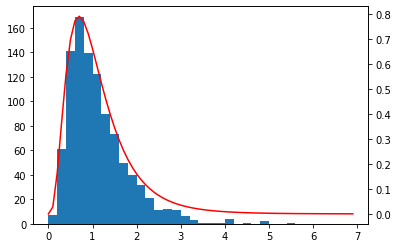

In [207]:
# figureインスタンスを作る
fig = plt.figure()
# Y軸を2つ作る。
ax1 = fig.subplots() # 1つめのY軸（左側）
ax2 = ax1.twinx() # 2つめのY軸　（右側）

ax1.hist(sq_3/sq_4, bins=np.arange(0,7,0.2)) #この場合、sq_4は自由度9, sq_3は自由度16として計算した不偏分散
ax2.plot(np.arange(0,7,0.1),stats.f.pdf(np.arange(0,7,0.1),dfn=9,dfd=16),color='r')
# dfn: 分子の自由度、dfd: 分母の自由度

仮に、$\frac{U_1}{U_2} > 2.56$だとしたら、その確率はどれほどでしょう？

In [211]:
stats.f.sf(2.56,dfn=9,dfd=16)

0.048463638231777

5%を切るくらい珍しいことだとわかります。その場合は、$\sigma_1^2 = \sigma_2^2$という前提を疑う必要があります。

#### 練習問題

正規母集団からの２つの標本の分散（標本分散）が次の通りであったとする。  
$$n_1 = 9,\;\;S_1^2 = 150; \;\; n_2 = 16, \;\; S_2^2 = 60$$  
２つの標本の母集団が同一である確率はどの程度か？

ヒント：  
$F$統計値を$F_0$とすると、$$F_0 = \frac{\frac{n_1S_1^2}{n_1 - 1}}{\frac{n_2S_2^2}{n_2 - 1}} = \frac{\frac{9\times 150}{9 - 1}}{\frac{16\times 60}{16 - 1}} = 2.637$$です。

次に、自由度が8と15の$F$分布で、累積分布関数の値$F(X \leqq F_0)$を求めます。つまり、不偏分散の比が$F_0$までに収まる確率です。1からこれを引けば、不偏分散の比が$F_0$以上になる確率がわかります。  

累積分布関数にはstats.f.cdf()があります。また、1から引かないで直接その確率を求めるには、stats.f.sf()を使います。

解答

In [34]:
n1 = 9
Sv1 = 150
n2 = 16
Sv2 = 60
df1 = n1 - 1
df2 = n2 - 1
F0 = (n1 *Sv1/df1)/(n2*Sv2/df2)
print("F0: ",F0)
stats.f(dfn=df1,dfd=df2).sf(F0)

F0:  2.63671875


0.05026316133523414

## 点推定の考え方

### 統計的推定

これまで、母集団から抽出した標本がもつ性質について説明しました。今度は、標本から母集団の性質を推定する方法論について説明します。  
母集団の性質で興味があるのは、母集団の確率分布の形を一意的に定める定数です。例えば、二項分布の試行数$n$と確率$p$であるとか、正規分布の平均$\mu$と分散$\sigma^2$、といったものです。そのような定数をその分布の**母数**あるいは**パラメータ**といいます。  
標本から導き出される統計量で、母集団の母数（パラメータ）の値を知るために使うものを**推定量**といいます。  
推定量を用いて母数の値を推測する方法を推定あるいは統計的推測といいます。 

### 推定量のもつべき性質

（１）**不偏性**：推定量の期待値が母数となるとき、それを母数の不偏推定量といいます。例えば、標本平均は母集団の平均の不偏推定量です。一方、標本分散は母集団の分散に等しくならないので、不偏推定量ではありません。そのために分母を標本数$n$ではなく$n - 1$におきかえたものを不偏分散とよぶことはすでに説明しました。  
（２）**一致性**：標本が大きくなるほど推定量が母数に近づくとき、母数の一致推定量といいます。例えば標本分散$S^2$と母集団の分散$\sigma^2$との関係は$S^2 = \frac{n-1}{n}\sigma^2$ですから$S^2$は不偏推定量ではありませんが、$\lim_{n \to \infty}\frac{n-1}{n}\sigma^2 = \sigma^2$より、一致推定量といえます。  
（３）**誤差（平均平方誤差）が少ないこと**：例えば正規分布に従う母集団の場合、標本平均も標本メジアンも母平均の不偏推定量です。しかし、標本平均の分散は$\frac{\sigma^2}{n}$なのに対し、標本メジアンの分散は、$n$が大であるとき近似的に$\frac{\pi\sigma^2}{2n}$となることが知られていて、標本平均よりも分散が大きくなっています。ですから、母平均の推定量としては標本平均のほうが良好です。なお、不偏推定量のうち平均平方誤差（分散）が最小のものを最良不偏推定量ということがあります。  

### 点推定とは

母数をもっとも正確に代表すると思われる単一の数値を推定量とすることを点推定といいます。単一の点を示すにしても、誤差も示す必要があります。  
（例１）標本平均で母平均$\mu$を推定する：この場合、標本平均の分散$S^2$は$S^2 = \frac{\sigma^2}{n}$となります。したがって、$S = \frac{\sigma}{\sqrt{n}}$となります。この$S$のことを標本誤差または**標準誤差**といいます。なお、$\sigma$は不偏分散から計算します。   
（例２）標本での比率から母集団の比率を推定する：標本比率$\frac{x}{n}$は母集団比率$p$の不偏推定量です。また、標本比率の分散$S^2$は$\frac{pq}{n}$となります。従って標準誤差$S = \sqrt{\frac{pq}{n}}$となります。さらに、$n$が大で、$p$または$q = 1 - p$があまり小でなければ、標本比率$\frac{x}{n}$の二項分布は正規分布で近似できます。

#### 練習問題（平均値の誤差）

飛行機の乗客の体重を平均165ポンド、標準偏差を8ポンドとして、120人乗りの旅客機の運ぶ旅客の総体重が20,000ポンドを超える確率はいくらか。ただし乗客は満員になるものとする。

ヒント：
- 母集団の標準偏差がわかっているので、標本の標準誤差がわかります。
- 与えられた標本の平均値を標準化（母集団の平均をひいて平均値の標準偏差すなわち標準誤差で割る）します。
- 標準正規分布$N(0,1)$の中で確率変数がその得点$x$より高くなる確率を1 - 累積分布関数（$-\infty$からxまで確率密度関数を積分したもの）で求めます。  
- 正規分布の累積分布関数：scipy.stats.norm.cdf()  
- 正規分布の生存関数（1 - 累積分布関数）：scipy.stats.norm.sf()

In [82]:
## 解法（練習問題医（平均値の誤差））
import numpy as np
from scipy import stats
w_mean = 20000/120 # 標本の平均値
err = 8/np.sqrt(120) # 120個からなる標本の標準誤差
st_score = (w_mean - 165)/err #標本平均の標準化
stats.norm.sf(st_score) # N(0,1)の中で、確率変数が、与えられた標本の平均値の標準化得点よりも高い値をとる確率

0.011239436683063014

### 区間推定とは

母数が一定の確率で含まれる区間を示すことで、母数の推定を行うことを区間推定といいます。  
その際、母数が一定の確率（**信頼係数**）（例えば95%以上）で含まれると期待される区間を**信頼区間**といいます。  
母集団の性質（つまり母数）についてどれだけの情報があるかによって、異なる区間推定の方法があります。

### 母集団の平均値の区間推定

#### 母集団が正規分布で、母集団の分散が既知の場合

母集団が平均$\mu$、分散$\sigma^2$のの正規分布（これを$N(\mu,\sigma^2)$と表します）に従うとき、$n$個の標本の平均$\bar{X}$を確率変数としたら、それは、$N(\mu, \frac{\sigma^2}{n})$の正規分布に従うことをこの回の最初のほうに紹介しました。

この分布を、$\bar{X}$から$\mu$をひいて平行移動させ、さらに、標本の標準誤差$\frac{\sigma}{\sqrt{n}}$で割って、標準化された統計量$$Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$をつくります。  
これは、標準正規分布$N(0, 1)$つまり平均0、分散1の正規分布に従います。

このとき、$Z$が95%の確率で収まる範囲(**95%信頼区間**)を求めるとします。  
一般的には次のような方法でこれを求めます。  
すなわち、$0 < \alpha < 1$であるような、ある$\alpha$に対して、統計量の確率分布の積分値（グラフの下の面積）が、左右$\frac{\alpha}{2}$ぶんを除いた残りの$1 - \alpha$ （これは信頼係数に等しいです）の部分に含まれるような統計量の範囲を求めます。例えば95%信頼区間を求めたい場合、$\alpha$の値は、0.05です。
そのような統計量の範囲の範囲を、$$Z_{\frac{\alpha}{2}} \leqq Z \leqq Z_{1 - \frac{\alpha}{2}}$$と表します。   

例えば$\alpha = 0.05$のとき 左端の$Z_\frac{\alpha}{2} = Z_{0.025}$です。

これは、標準正規分布の確率密度関数を、$-\infty$からある$x$まで積分すると曲線の下の面積が0.025つまり2.5%になるような$x$の値です。

言い換えると、標準正規分布の累積分布関数$F(X \leq x) = 0.025$となるような$x$の値です。

0.05でなく0.025なのは、信頼区間の外側には、下側（左側）と上側（右側）とがあり、両方における曲線の下の面積をあわせて0.05にするからです。すると、それぞれの面積は0.025ずつになります。

同様に、$Z_{1 - \frac{\alpha}{2}} = Z_{0.975}$は、累積分布関数$F(X \leq x) = 0.975$となるような$x$の値です。

標準正規分布はY軸に対して左右対称なので、$Z_{1 - \frac{\alpha}{2}} = - Z_{\frac{\alpha}{2}}$です。
$x \geqq Z_{1 - 0.025}$に対して確率密度曲線の下を塗ると、次のようになります。

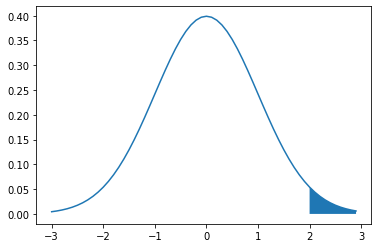

In [252]:
# 上側2.5％点
p = stats.norm.isf(0.025)
# 標準正規分布の描画
fig = plt.figure()
ax = fig.subplots()
x_vals = np.arange(-3,3,0.1)
y_vals = stats.norm.pdf(x_vals)
ax.plot(x_vals,y_vals)
# 標準正規分布の下、X軸の上で、xの値が上側2.5％点(p)以上の面積(確率)を塗りつぶす
ax.fill_between( x_vals, y_vals, 0, where=x_vals>p)

上側0.025%点の値は、scipy.stats.norm.isf(0.025)でわかります。

In [212]:
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

In [214]:
stats.norm.isf(0.025)

1.9599639845400545

この値は、一般的には1.96で通っています。

したがって、$Z$の95%信頼区間は、下のグラフで塗った範囲の、X軸の値になります。

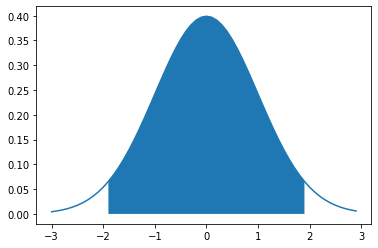

In [251]:
# 上側2.5％点
p = stats.norm.isf(0.025)
# 標準正規分布の描画
fig = plt.figure()
ax = fig.subplots()
x_vals = np.arange(-3,3,0.1)
y_vals = stats.norm.pdf(x_vals)
ax.plot(x_vals,y_vals)
# 標準正規分布の下、X軸の上で、xの値が下側2.5％点(-p)以上で上側2.5％点(p)以下の面積(確率)を塗りつぶす
ax.fill_between( x_vals, y_vals, 0, where=(x_vals > -1*p)&(x_vals < p))

従って、$\mu$の95%信頼区間は、$$\bar{X}  \pm 1.96 \frac{\sigma}{\sqrt{n}}$$の間、つまり、平均$\pm 1.96\times$標準誤差となります。念のためにですが、この$\sigma$は母集団の標準偏差（分散の平方根）で、不偏分散の平方根に相当します。

#### 練習問題（母集団の分散が既知の場合の推定）

ある年に首都圏の勤労者世帯$n = 2500$を対象に実施された調査で、当該月の消費支出の平均が$\bar{x} = 32.8$万円、標準偏差が$\hat{\sigma} = 29.5$万円となった。  
(1) 首都圏の勤労者世帯を母集団とする平均消費支出額$\mu$について95%信頼区間を求めよ。  

ヒント：標本サイズが2500と大きいので、標本の標準偏差を母集団の標準偏差とみなせます。標本平均の標準誤差は母集団の標準偏差と標本の大きさからわかります。平均値の95%信頼区間は平均値$\pm$1.96$\times$標準誤差　です。  
1.96という数字は、$N(0,1)$の累積分布関数$F(X\leqq x) = 0.975$となるような$x$で、  
stats.normal.ppf(0.975)で求められます。  
下限となる$x$は、これの符号を反対にするか、  
stats.normal.ppf(0.025)で求めます。

In [46]:
#解答（母集団の分散が既知の場合の推定）
n = 2500
x_mean = 32.8
s = 29.5
x_upper = x_mean + stats.norm.ppf(0.975)*s/np.sqrt(n)
x_lower = x_mean + stats.norm.ppf(0.025)*s/np.sqrt(n)
print("上限： ",round(x_upper,2))
print("下限： ",round(x_lower,2))

上限：  33.96
下限：  31.64


#### 母集団が正規分布で、母集団の分散が未知の場合→小標本ならば$t$分布を使う

この場合も、正規化された統計量$Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$をつくるところまでは同じです。しかし母分散$\sigma^2$がわかりませんので、さらに別の統計量で割って、$\sigma$を消すことにします。  

$\chi^2$分布のところで説明したように、標本分散$S$に対して、統計量$\chi^2 = \frac{nS^2}{\sigma^2}$は自由度$n-1$の$\chi^2$分布に従います。これを自由度$n -1$で割ったもの、すなわち$\frac{nS^2}{\sigma^2{(n-1)}}$の平方根で、$z$を割ります。そうすると、
$$T = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} \sqrt{\frac{\sigma^2(n - 1)}{nS^2}}  = \frac{\bar{X} - \mu}{\frac{S}{\sqrt{n - 1}}} = \frac{\bar{X} - \mu}{\frac{U}{\sqrt{n}}}$$
ができます。ここで、$nS^2 = (n - 1)U^2$の関係を使いました。正規分布をするものを、「$\chi^2$分布するものを自由度で割ったもの(つまり１自由度あたりの$\chi^2$統計量)の平方根」で割ると、それは$t$分布になることは、$t$分布のところで説明しました。ですから、こうしてできた$T$は、平均が0で、自由度 $n - 1$ の、$t$分布$t_{(n - 1)}$に従います。

この$T$は確率的にさまざまな値を取りえますが、その95%は、累積分布関数$F(X \leq x)$の値が0.025から0.975の間にあると推定されます。それらの値は、stats.t(df=df).ppf(0.025)ならびにstats.t(df=df).ppf(0.975)で求められます（dfは自由度）。例えば標本数$n = 11$のとき自由度$n - 1 = 10$ですから、$T$の上限$t_{n-1}(0.025)$は

In [75]:
stats.t(df=10).ppf(0.975)

2.2281388519649385

となります。そして、$\mu$の95%信頼区間は、$$\bar{X} \pm t_{n-1}(0.025)\frac{S}{\sqrt{n-1}}$$となります。$S$を$U$に置き換えると、$$\bar{X} \pm t_{n-1}(0.025)\frac{U}{\sqrt{n}}$$となります。こちらのほうがよく使われます。

#### 練習問題（$t$分布による平均値の95%信頼区間の推定）

世帯数9,420の市で16世帯の確率標本を選んで世帯員数を調べて次の結果を得た。  
<pre>           5    2    4    7    6    4    4    4    3    4    3     3     3     5    2     5  </pre>
 (a) 市の人口を推定せよ  
 (b) 市の人口の95%信頼区間を求めよ

ヒント：(a) 平均世帯数x 世帯数 = 人口です。標本平均で母集団の平均とします。

ヒント：(b)標本数が小さいので、標本平均値は正規分布ではなくて自由度が$16 -1 = 15$の$t$分布に従うものとみなします。  
$t$分布の累積分布関数$F(X \leqq x) = 0.975$になるような$x$が、「標準化された」平均値の上限になります。$t$分布は$X = 0$に対して左右対称なので、これの符号を反対にすれば「標準化された」平均値の下限になります。  
標本の平均値$\bar{X}$を標準化するには、平均値の平均値を$\mu$、標準誤差を$err$として、$\frac{\bar{X} - \mu}{err}$とします。標準誤差$err$は$\frac{S}{\sqrt{n - 1}}$または$\frac{U}{\sqrt{n}}$です。逆算すると、$\bar{X} = \mu + err * 標準化得点$となります。

In [77]:
## 解答(ｔ分布による平均値の信頼区間推定)
# (a)市の人口の推定
num_house = 9420
sample_data = np.array([5,2,4,7,6,4,4,4,3,4,3,3,3,5,2,5])
sample_mean = np.mean(sample_data)
city_population = num_house * sample_mean
print("市の推定人口は ",city_population," 人")

市の推定人口は  37680.0  人


In [80]:
## 解答(ｔ分布による平均値の信頼区間推定)
# (a)市の人口の95%信頼区間
n = len(sample_data) # 16世帯
u = np.std(sample_data,ddof=1) ## 不偏分散の平方根（=U) (stdはstandard deviation (標準偏差))
err = u/np.sqrt(n) # 標本誤差
t_upper = stats.t(df=n-1).ppf(0.975)
t_lower = stats.t(df=n-1).ppf(0.025)
mean_upper = sample_mean + err*t_upper
mean_lower = sample_mean + err*t_lower
pop_upper = mean_upper * num_house
pop_lower = mean_lower * num_house
print("上限：",round(pop_upper))
print("下限；",round(pop_lower))

上限： 44538
下限； 30822


### 母集団の分散の区間推定

この項目は、$\chi^2$分散の項の続きになります。

母集団の分散を$\sigma^2$, 標本数を$n$, 標本分散を$S^2$としたとき、統計量$\frac{nS^2}{\sigma^2}$($=\frac{(n - 1)U^2}{\sigma^2}$)が、自由度$n - 1$の$\chi^2$分布に従います。この統計量の95%信頼区間は、例えば自由度が9（つまり標本のサイズが10のとき）の場合、下の図のようになります。

図を描く前に、X軸の左端の値（つまり、0からそこまで積分したら曲線の下の面積が0.025になる値）はいくつでしょうか？  
stats.chi2.ppf()関数を用います。これは、stats.chi2.cdf()関数の逆関数です。

In [248]:
stats.chi2.ppf(0.025,df=9) # これを下のプログラムでp1に代入します。

2.7003894999803584

同様に、右端の値（つまり、そこから無限大まで積分したら面積が0.025になる値）はいくつでしょうか？  
stats.chi2.isf()関数を用います。これは、stats.chi2.sf()関数の逆関数です。

In [249]:
stats.chi2.isf(0.025,df=9) # これを下のプログラムでp2に代入します。

19.022767798641638

では、図を描いてみましょう。

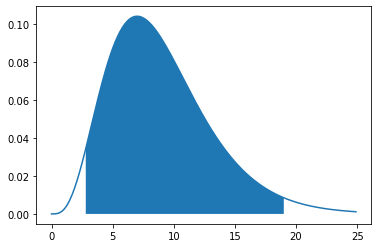

In [247]:
fig = plt.figure()
ax1 = fig.subplots()
x_vals = np.arange(0,25,0.1)
y_vals = stats.chi2.pdf(x_vals,df=9)
ax1.plot(x_vals, y_vals)
p1 = stats.chi2.ppf(0.025,df=9) # 左端の値
p2 = stats.chi2.isf(0.025,df=9) # 右端の値
ax1.fill_between( x_vals, y_vals, 0, where=(x_vals > p1)&(x_vals < p2))

この図で塗った部分の面積が0.95になります。塗った部分のX軸の値が、統計量が95%の確率で取りうる値です。

上のプログラムで、$p_1$, $p_2$をそれぞれ$\chi_{0.025}^2$, $\chi_{0.975}^2$と表すことにします。累積確率密度（$-\infty$からある値まで、確率密度関数を積分した値）がそれぞれ0.025, 0.975という意味です。  
すると、$\sigma^2$の95%信頼区間は、$$\frac{nS^2}{\chi_{0.975}^2} \leqq \sigma^2 \leqq \frac{nS^2}{\chi_{0.025}^2}$$あるいは$$\frac{(n - 1)U^2}{\chi_{0.975}^2} \leqq \sigma^2 \leqq \frac{(n-1)U^2}{\chi_{0.025}^2}$$となります。

注：$\chi^2$分布は左右非対称なので、$\alpha$を左右に等分するのが適切かどうかは議論の余地があります。他には、信頼区間の幅が最小になるように$\alpha$を左右に分配するという方針も考えられます。そのための方法についてはこのコースの範囲を超えるので扱いません。

#### 練習問題

標本の大きさ$n = 10$、標本の標準偏差$S = 5$であるとき、母集団の標準偏差$\sigma$の95%および99%の信頼区間を求めましょう。  

ヒント：95%信頼区間の場合、$\chi^2$の上限と下限はそれぞれscipy.stats(df=n-1).chi2.ppf(p)で求めます。ただし、それぞれ$p=0.975$と$p=0.025$です。99%信頼区間の場合は、それぞれ$p=0.995$と$p=0.005$です。

In [6]:
import numpy as np
from scipy import stats
n = 10
df = n - 1
s = 5
chi2_975 = stats.chi2(df=df).ppf(0.975)
chi2_025 = stats.chi2(df=df).ppf(0.025)
chi2_995 = stats.chi2(df=df).ppf(0.995)
chi2_005 = stats.chi2(df=df).ppf(0.005)
lower_95 = np.sqrt(n*s**2/chi2_975)
upper_95 = np.sqrt(n*s**2/chi2_025)
lower_99 = np.sqrt(n*s**2/chi2_995)
upper_99 = np.sqrt(n*s**2/chi2_005)
print("95%: ",round(lower_95,2)," - ",round(upper_95,2))
print("99%: ",round(lower_99,2)," - ",round(upper_99,2))

95%:  3.63  -  9.62
99%:  3.26  -  12.0


### 母集団の平均の差の推定

標本どうしで平均に差があるか、あるとしたらどの程度か、という議論は日常的に行われます。これは、言い換えれば、それぞれの母集団の間の平均の比較です。

そこで、２つの標本の大きさがそれぞれ$m$と$n$で、標本平均はそれぞれ$\bar{X_1}$と$\bar{X_2}$で、標本分散はそれぞれ$S_1^2, S_2^2$だとします。それぞれが想定する母集団の平均ならびに分散を、前者に対しては$\mu_1$ならびに$\sigma_1$、後者に対しては$\mu_2$ならびに$\sigma_2$とします。

標本平均$\bar{X_1}$, 標本平均$\bar{X_2}$はそれぞれ正規分布$N(\mu_1, \sigma_1^2/m)$, $N(\mu_2, \sigma_2^2/n)$に従います。  
また、２つの独立な確率変数$X$, $Y$について、$X - Y$の期待値$E(X - Y) = E(X) - E(Y)$で、分散$V(X - Y) = V(X) + V(Y)$ですから、  
$\bar{X_1} - \bar{X_2}$は正規分布$N(\mu_1 - \mu_2, \frac{\sigma_1^2}{m} +\frac{\sigma_2^2}{n})$に従います。

$\bar{X_1} - \bar{X_2}$を標準化したもの、すなわち、$$\frac{\bar{X_1} - \bar{X_2} - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{m} +\frac{\sigma_2^2}{n}}}$$は標準正規分布$N(0,1)$に従います。

$\sigma_1 = \sigma_2 = \sigma$とすると、これは$$\frac{\bar{X_1} - \bar{X_2} - (\mu_1 - \mu_2)}{\sigma\sqrt{\frac{1}{m} +\frac{1}{n}}}$$と書き換えられます。

一方、$\chi^2$分布のところで、標本数を$n$, 標本分散を$S^2$, 母分散を$\sigma^2$として、$\frac{nS^2}{\sigma^2}$が自由度$n - 1$の$\chi^2$分布に従うことを示しました。  
$\sigma_1^2 = \sigma_2^2 = \sigma^2$ですから、２つの標本を合併したものについても同様に、統計量$$\frac{mS_1^2 + nS_2^2}{\sigma^2}$$は自由度$$(m - 1) + (n - 1) = (m + n - 2)$$の$\chi^2$分布に従います。  

$t$分布で示したように、後者（$\chi^2$分布にしたがうほう）を自由度$n + m - 2$でわって平方根をとったものすなわち  
$$\sqrt{\frac{mS_1^2 + nS_2^2}{\sigma^2}\frac{1}{m + n - 2}}$$で、前者（標準正規分布に従うほう）つまり$$\frac{\bar{X_1} - \bar{X_2} - (\mu_1 - \mu_2)}{\sigma\sqrt{\frac{1}{m} +\frac{1}{n}}}$$を割ると、$\sigma$が消えて、

統計量$$t' = \frac{\bar{X_1} - \bar{X_2} - (\mu_1 - \mu_2)}{\sigma^{'}}\sqrt{\frac{nm}{n + m}}$$ ただし $$\sigma^{'2} = \frac{mS_1^2 + nS_2^2}{n + m - 2}$$　は、自由度$(n + m -2)$の$t$分布に従います。

よって、$\mu_1 - \mu_2$の95%信頼区間は、$$(\bar{X_1} - \bar{X_2}) \pm t_{{m + n -2},(0.975)}\sqrt{\frac{mS_1^2 + nS_2^2}{n + m - 2}}\sqrt{\frac{1}{n} + \frac{1}{m}}$$あるいは$$(\bar{X_1} - \bar{X_2}) \pm t_{{m + n - 2},(0.975)}\sqrt{\frac{(m - 1)U_1^2 + (n - 1)U_2^2}{n + m - 2}}\sqrt{\frac{1}{n} + \frac{1}{m}}$$となります。

つまり$$(\bar{X_1} - \bar{X_2}) \pm t_{{m + n -2},(0.975)}\sigma^{'}\sqrt{\frac{1}{n} + \frac{1}{m}}$$です

#### 練習問題

ある中学のA組とB組では、県下一斉テストの数学の成績は、下の表のようになりました。

|クラス|受験者数|平均|不偏分散|
|--|--|--|--|
|A|25|73|104|
|B|30|66|72|

平均点の差（ただしA - B）の95%信頼区間を求めてください。

ヒント：統計量$$t' = \frac{\bar{X_1} - \bar{X_2} - (\mu_1 - \mu_2)}{\sigma^{'}}\sqrt{\frac{nm}{n + m}}$$ ただし $$\sigma^{'2} = \frac{mS_1^2 + nS_2^2}{n + m - 2} = \frac{(m - 1)U_1^2 + (n - 1)U_2^2}{n + m - 2}$$　は、自由度$(n + m -2)$の$t$分布に従います。$m = 25$, $n = 30$, $\mu_1 = 73$, $\mu_2 = 66$, $U_1 = 104$, $U_2 = 72$です。 従って、自由度は$25 + 30 -2 = 53$です。

In [19]:
import numpy as np
from scipy import stats
m = 25
n = 30
mu_1 = 73
mu_2 = 66
u_1 = 104
u_2 = 72
df = m + n - 2
diff = mu_1 - mu_2
sigma_sq = ((m - 1)*u_1 + (n - 1)*u_2)/(m + n - 2)
sigma = np.sqrt(sigma_sq*(m+n)/(m*n))
t_lower = stats.t(df = df).ppf(0.025)
t_upper = stats.t(df = df).ppf(0.975)
low_high = diff + np.array([t_lower, t_upper])*sigma
print("下限　上限：",low_high)

下限　上限： [ 1.94860865 12.05139135]
